Before starting the algorithms we need to tell the algorithm the value of k
Then we need to declare k random points also know as centroid. They will act as a center points in the algorithms
Next step is find the distance between each data point to the centroid and cluster them together as per the distance
Then adjust the centroids and again compute the distance and accordingly readjust the cluster
Follow the above step until none of the data points changes the cluster. Data points should stop changing the cluster

How to determine the value of k?
There is algorithm called as algo-method
Here we compute sum of square errors for each cluster
SSE1 = summation of (dist(xi - c1))**2
.
.
.
SEE2

Then SSE = SEE1 + SEE2 . . . . +SEEn
We will plot the SSE vs K
It will be decreasing. There will be a elbow point so we need to consider that elbow point


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


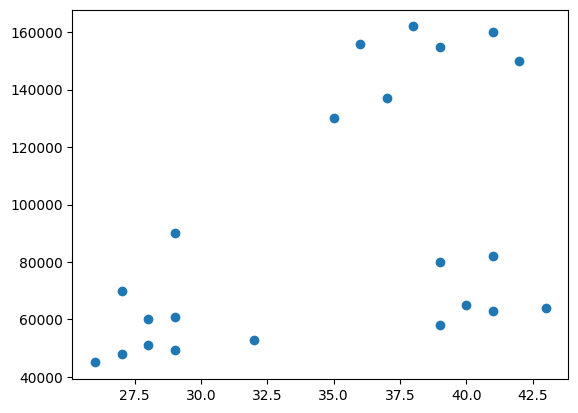

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [6]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


C:\Users\Artophilic\AppData\Local\Temp\ipykernel_5544\2227416302.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


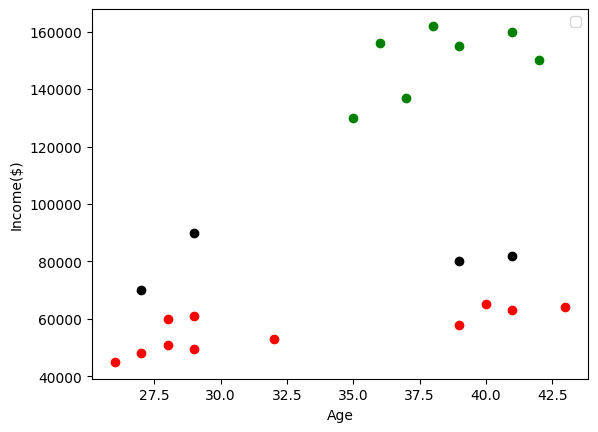

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [13]:
#Scaling

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [15]:
km2 = KMeans(n_clusters=3)
y_pred2 = km.fit_predict(df[['Age','Income($)']])
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster'] = y_pred2
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [20]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


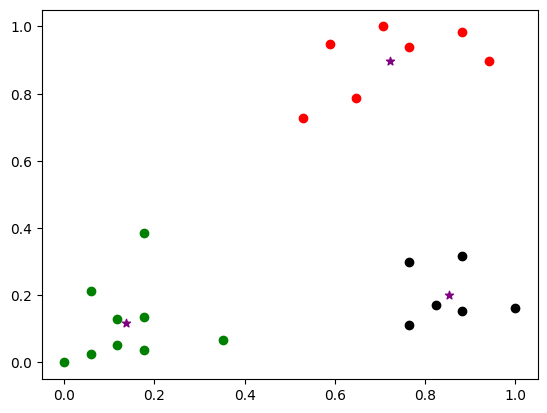

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

In [22]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [24]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [25]:
print(sse)

[5.434011511988176, 2.091136388699076, 0.4750783498553094, 0.3698658919234832, 0.2963623258321303, 0.2371964150616223, 0.20388479965602677, 0.1471853679399594, 0.1210400762514594]


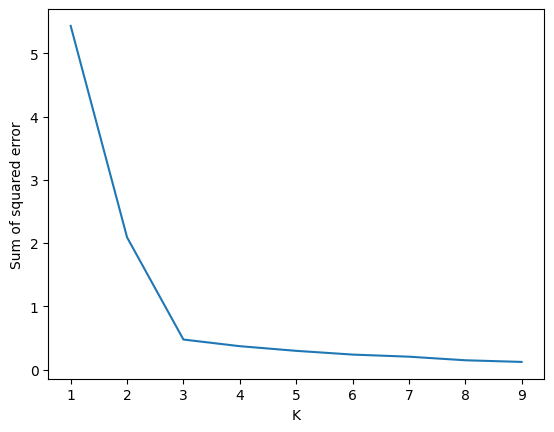

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

Above we can use elbow method to decide the number of clusters. Elbow point is where the graph bends here in the above case it is 3